# 07

Create a Linear Regression Model using Python/R to predict home prices.The
objective is to predict the value of prices of the house using the given features in
the dataset.

In [1]:
#Import all the required Python Libraries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
#Load the Dataset into pandas’ data frame.
df=pd.read_csv("BostonHousing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
#Choose 2 variables among which you want to calculate correlation. Here, it's rm and medv.

X=df['rm']
Y=df['medv']

In [6]:
#divide the data into train and test. by default, test_size =0.25
from sklearn.model_selection import train_test_split

#order is important
X_train,X_test,Y_train,Y_test = train_test_split(df,Y,test_size=0.3,random_state=5)

In [7]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

#fit train data according to the model
lm.fit(X_train,Y_train)

LinearRegression()

In [8]:
#predict Y for X_test
Y_test_pred=lm.predict(X_test)

In [9]:
Y_test_pred

array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5, 13.1, 50. ,  8.8, 20.6, 12.1, 50. , 24.1, 16.1,
       23.9, 24.3, 13.1, 30.3, 15.2, 13.8, 26.4, 16.6, 18.9, 17.6, 18.7,
       33.4, 20.7, 17.1, 23.4, 26.5, 21.4, 21.5, 19.2, 50. , 50. , 23. ,
       10.5, 17.8, 10.9, 21. , 13.8, 10.5, 22.2, 30.5, 19.4, 15.6, 20.2,
       19.3, 34.6, 50. , 24. , 18.7, 19.8, 22.5, 13

In [10]:
from sklearn.metrics import mean_squared_error,r2_score

Y_train_pred=lm.predict(X_train)
rmse_train=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
r2_train=r2_score(Y_train,Y_train_pred)
print(f"The model performance for Train Data is - \nRMS: {rmse_train}\nR2 Score: {r2_train}")

Y_test_pred=lm.predict(X_test)
rmse_test=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
r2_test=r2_score(Y_test,Y_test_pred)
print(f"\nThe model performance for Test Data is - \nRMS: {rmse_test}\nR2 Score: {r2_test}")

The model performance for Train Data is - 
RMS: 3.72668564962201e-14
R2 Score: 1.0

The model performance for Test Data is - 
RMS: 4.015774489586265e-14
R2 Score: 1.0


<Axes: xlabel='rm', ylabel='medv'>

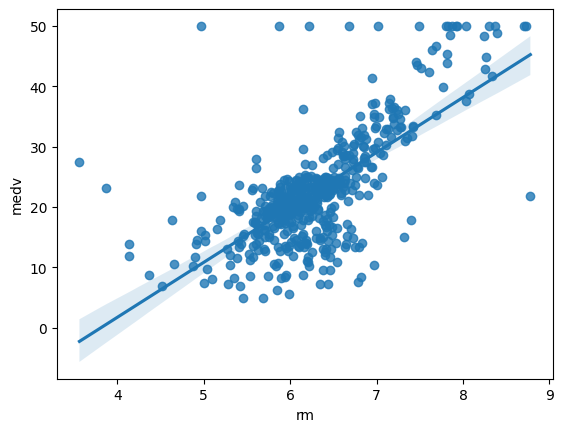

In [11]:
sns.regplot(data=df,x=X,y=Y)

<Axes: >

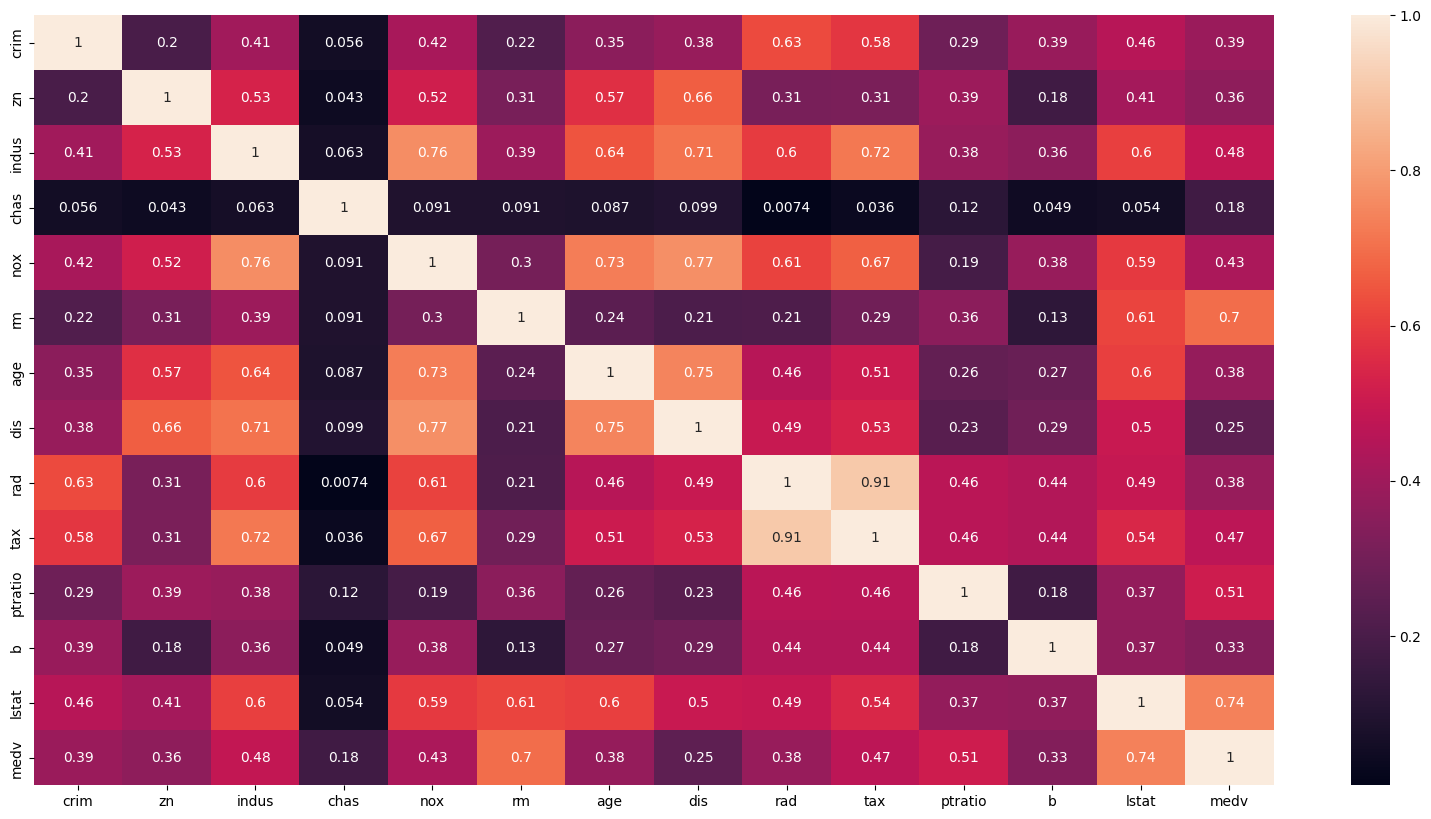

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)